In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from scipy import stats
import math
from scipy.sparse import csc_matrix
import random
import operator
import scipy.io
import collections

# for Notebook
%matplotlib inline

In [ ]:
# Out of Below Five Block execute the one based on which dataset you want to load

In [ ]:
G=nx.read_weighted_edgelist("higgs-mention_network.edgelist",create_using=nx.DiGraph())

In [ ]:
G = read_edgelist("com-dblp.ungraph.txt",nodetype=int)

In [ ]:
data= scipy.io.loadmat('IMDBdataset.mat')
A = data['links'][0][0]
G = nx.from_scipy_sparse_matrix(A, parallel_edges=False, create_using=None)

In [8]:
data= scipy.io.loadmat('SLAPdataset.mat')
A = data['links'][0][0]
G=nx.from_scipy_sparse_matrix(A, parallel_edges=False, create_using=None)

In [ ]:
def load_restaurant_dataset():
    path = 'dataset_ubicomp2013_checkins.txt'
    infile = open(path, 'r')
    a = set()
    b = set()
    edges = []
    for line in infile:
        s=line.strip().split(None)
        u=-1*int(s.pop(0)) -10
        v=int(s.pop(0))
        a.add(u)
        b.add(v)
        edges.append((u,v))
    top_nodes = {}
    bottom_nodes = {}
    count = 0 
    for x in a:
        top_nodes[x] = count
        count = count + 1
    count  = 0    
    for y in b:
        bottom_nodes[y] = count
        count  = count + 1
    
    A = np.zeros((len(a),len(b)))
    for edge in edges:
        e1 = top_nodes[edge[0]]
        e2 = bottom_nodes[edge[1]]
        A[e1, e2] = 1
    
    A = np.dot(A,A.T)
    for i in range(0,A.shape[0]):
        for j in range(0,A.shape[1]):
            if i == j :
                A[i,j] = 0
            else:
                if A[i,j] != 0:
                  A[i,j] = 1
                else:
                  A[i,j] = 0
          
                                     
    G=nx.from_numpy_matrix(A)
    return G
G = load_restaurant_dataset()

In [25]:
print(nx.info(G))
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))
print(nx.is_directed(G))
print(nx.average_clustering(G))

Name: 
Type: Graph
Number of nodes: 20419
Number of edges: 30213
Average degree:   2.9593
20419
30213
False
0.03848009845938926


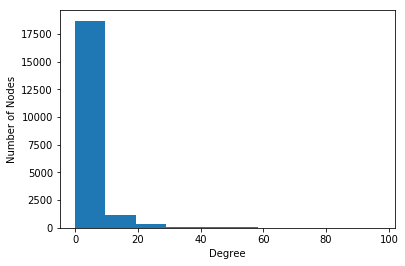

In [10]:
#Degree Distribution without use of networkX
plt.figure()
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.savefig('degree_distribution_code.png')
plt.show()

In [15]:
def Degree_Distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")

    plt.savefig('degree_distribution.png')
    plt.show()

In [16]:
def plot_clustering(G):
  cluster = nx.clustering(G)
  plt.hist(cluster.values())
  plt.xlabel("Clustering Coeficient")
  plt.ylabel("No of Nodes")
  plt.show()

In [17]:
def get_avg_path_length(G):
  try:
    avgPath = nx.average_shortest_path_length(G)
    print("avg path lenth = " ,avgPath)
  except:
    print("avg path lenth is infinite length")

In [18]:
def get_giant_cluster(G):
  GC = max(nx.connected_component_subgraphs(G), key=len)
  print("Nodes in giant cluster = " ,GC.number_of_nodes())
  diameter = nx.algorithms.distance_measures.diameter(G)
  print("diameter = " , diameter)

In [ ]:
Degree_Distribution(G)
plot_clustering(G)
get_avg_path_length(G)
get_giant_cluster(G)

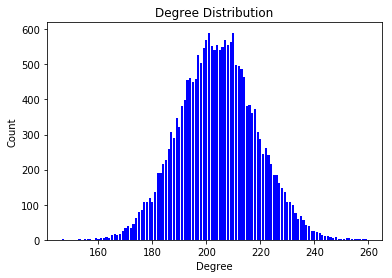

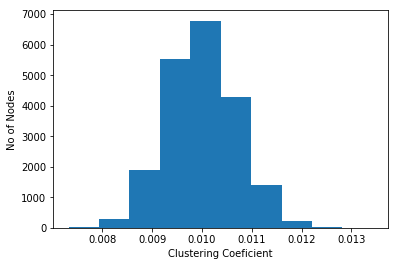

In [20]:
randomGraph = nx.fast_gnp_random_graph(nx.number_of_nodes(),0.01)
Degree_Distribution(randomGraph)
plot_clustering(randomGraph)

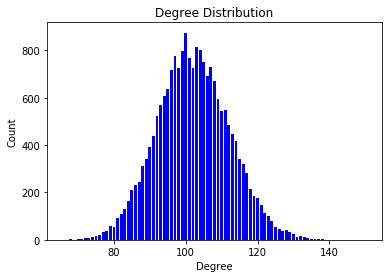

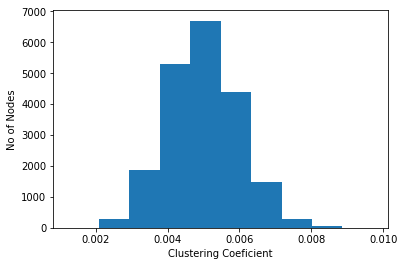

In [19]:
randomGraph = nx.fast_gnp_random_graph(nx.number_of_nodes(),0.005)
Degree_Distribution(randomGraph)
plot_clustering(randomGraph)

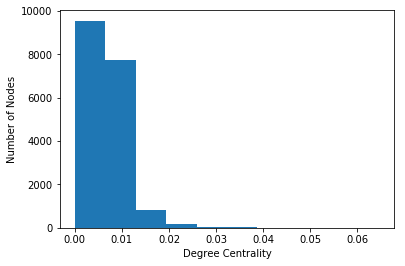

In [9]:
degreeCentrality=[(x[1]/(nx.number_of_nodes(G) - 1)) for x in list(nx.degree(G))]
plt.figure()
plt.hist(degreeCentrality)
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('degree_centrality_code.png')
plt.show()

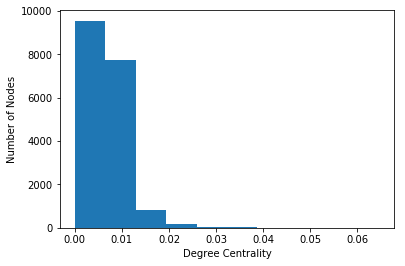

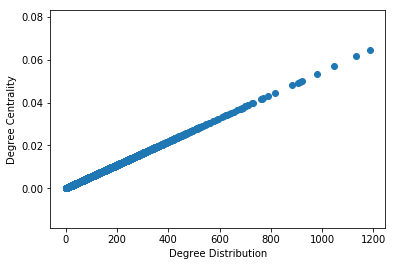

In [10]:
deg_cent = nx.degree_centrality(G)
plt.figure()
plt.hist(list(deg_cent.values()))
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('degree_centrality.png')
plt.show()

In [0]:
ideal = nx.closeness_centrality(G) 

In [0]:
plt.figure()
plt.hist(list(ideal.values()) )
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('closeness.png')
plt.show()

In [0]:
eigen = nx.eigenvector_centrality(G,weight='weight')

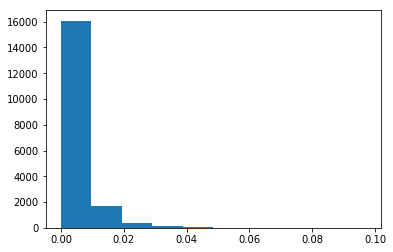

In [0]:
plt.figure()
plt.hist(list(eigen.values()))
plt.xlabel("Eigen Vector Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('eigen.png')
plt.show()

In [0]:
phi = (1+math.sqrt(G.number_of_nodes()))/2.0
katz = nx.katz_centrality(G,0.01)

In [0]:
print(katz.values())

In [0]:
plt.figure()
plt.hist(list(katz.values()))
plt.xlabel("Katz Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('katz.png')
plt.show()

In [0]:
pageRank = nx.pagerank(G)

In [0]:
print(list(pageRank.values()))

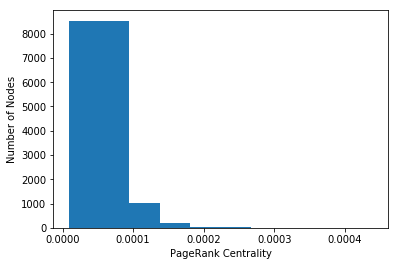

In [16]:
plt.figure()
plt.hist(list(pageRank.values()))
plt.xlabel("PageRank Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('pageRank.png')
plt.show()

In [0]:
h,a = nx.hits(G,max_iter=500)

In [0]:
print(h.values(),a.values())

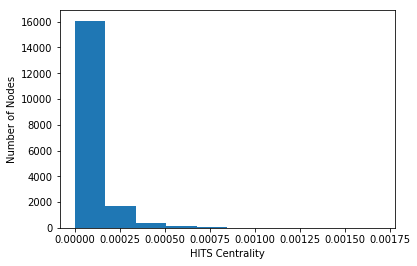

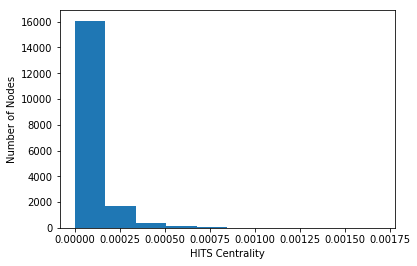

In [18]:
plt.figure()
plt.hist(list(h.values()))
plt.xlabel("HITS Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('hits_h.png')
plt.show()

plt.figure()
plt.hist(list(a.values()))
plt.xlabel("HITS Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('hits_a.png')
plt.show()

In [0]:
betweenness = nx.betweenness_centrality(G)

In [0]:
print(betweenness.values())

In [0]:
plt.figure()
plt.hist(list(Betweenness.values()))
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.savefig('betweenness.png')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
ds = pd.DataFrame()

In [ ]:
ds['Betweenness Centrality'] = np.asarray(list(betweenness.values()))
ds['Degree Centrality'] = np.asarray(list(deg_cent.values()))
ds['Closeness Centrality'] = np.asarray(list(ideal.values()))
ds['Katz Centrality'] = np.asarray(list(katz.values()))
ds['PageRank Centrality'] = np.asarray(list(pageRank.values()))
ds['Eigen Vector Centrality'] = np.asarray(list(eigen.values()))
ds['HITS Centrality'] = np.asarray(list(h.values()))

In [ ]:
## Correlation Matrix.
corr_mat = ds.corr()
sns.heatmap(corr_mat);